# checking train/eval similarity

In [5]:
import pandas as pd
import numpy as np

In [1]:
TRAIN_PATH          = "gs://mlteam-ml-specialization-2021-blackfriday/dataset/parsed/202104130952/train.csv"
EVAL_PATH           = "gs://mlteam-ml-specialization-2021-blackfriday/dataset/parsed/202104130952/test/evalset.csv"

In [3]:
df_train = pd.read_csv(TRAIN_PATH)
df_eval  = pd.read_csv(EVAL_PATH)

In [6]:
train_products = df_train["Product_ID"].unique()
eval_products  = df_eval["Product_ID"].unique()
intersection = np.intersect1d(train_products, eval_products)
dict(
    train_products_number        = train_products.shape[0],
    eval_products_number         = eval_products.shape[0],
    intersection_products_number = intersection.shape[0],
)

{'train_products_number': 3250,
 'eval_products_number': 3540,
 'intersection_products_number': 3228}

# do the same users buy the same products in train and eval?

In [74]:
# let's define a user by the combination of its own features
USER_FEATURES       = ["Gender", "Age", "Occupation", "City_Category", "Stay_In_Current_City_Years", "Marital_Status"]
train_shopping = df_train.rename(columns={"Product_ID":"Product_ID_train"}).groupby(USER_FEATURES)["Product_ID_train"].apply(np.array)
eval_shopping  = df_eval.rename(columns={"Product_ID":"Product_ID_eval"}).groupby(USER_FEATURES)["Product_ID_eval"].apply(np.array)

In [75]:
df_comparison  = pd.DataFrame([train_shopping, eval_shopping]).T.dropna()
df_comparison_stats=df_comparison.apply(lambda x: pd.Series({
    "train_size": x["Product_ID_train"].shape[0],
    "eval_size": x["Product_ID_eval"].shape[0],
    "intersection_size": np.intersect1d(x["Product_ID_train"], x["Product_ID_eval"]).shape[0]
}), axis=1)

In [76]:
df_comparison_stats["intersection_over_train"]=df_comparison_stats["intersection_size"]/df_comparison_stats["train_size"]

<AxesSubplot:ylabel='Frequency'>

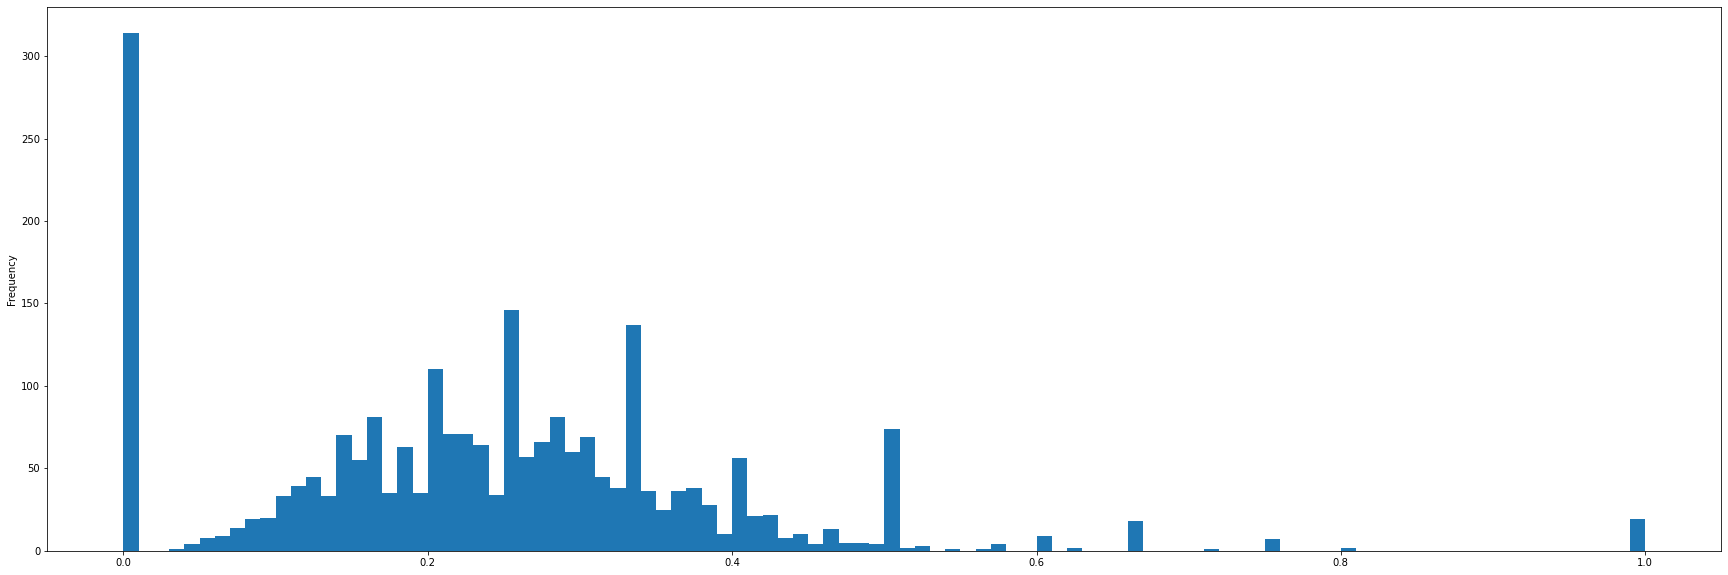

In [77]:
df_comparison_stats["intersection_over_train"].plot.hist(bins=100, figsize=(30,10))

In [78]:
result_all_features=dict(
    total_intersection_over_train = df_comparison_stats["intersection_size"].sum()/df_comparison_stats["train_size"].sum(),
    total_intersection_over_eval  = df_comparison_stats["intersection_size"].sum()/df_comparison_stats["eval_size"].sum(),
    total_train_products = df_train.shape[0],
    intersection_train_products = df_comparison_stats["train_size"].sum(),
    total_eval_products = df_eval.shape[0],
    intersection_eval_products = df_comparison_stats["eval_size"].sum(),
)
result_all_features

{'total_intersection_over_train': 0.2933797820483373,
 'total_intersection_over_eval': 0.08392438008534435,
 'total_train_products': 78366,
 'intersection_train_products': 78366,
 'total_eval_products': 274284,
 'intersection_eval_products': 273949}

# How does this change with less features?

In [79]:
USER_FEATURES       = ["Gender", "Age", "Occupation"]
train_shopping = df_train.rename(columns={"Product_ID":"Product_ID_train"}).groupby(USER_FEATURES)["Product_ID_train"].apply(np.array)
eval_shopping  = df_eval.rename(columns={"Product_ID":"Product_ID_eval"}).groupby(USER_FEATURES)["Product_ID_eval"].apply(np.array)

In [80]:
df_comparison  = pd.DataFrame([train_shopping, eval_shopping]).T.dropna()
df_comparison_stats=df_comparison.apply(lambda x: pd.Series({
    "train_size": x["Product_ID_train"].shape[0],
    "eval_size": x["Product_ID_eval"].shape[0],
    "intersection_size": np.intersect1d(x["Product_ID_train"], x["Product_ID_eval"]).shape[0]
}), axis=1)

In [81]:
df_comparison_stats["intersection_over_train"]=df_comparison_stats["intersection_size"]/df_comparison_stats["train_size"]

<AxesSubplot:ylabel='Frequency'>

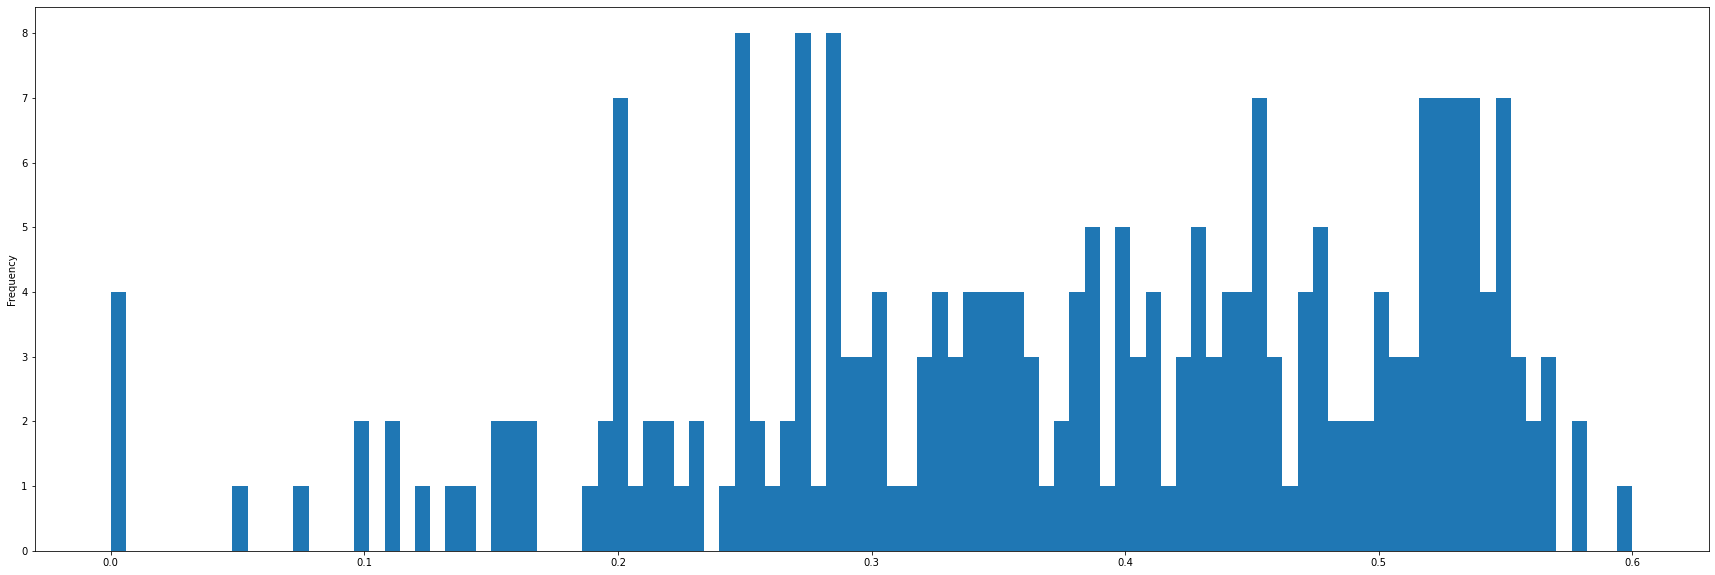

In [82]:
df_comparison_stats["intersection_over_train"].plot.hist(bins=100, figsize=(30,10))

In [83]:
result_few_features=dict(
    total_intersection_over_train = df_comparison_stats["intersection_size"].sum()/df_comparison_stats["train_size"].sum(),
    total_intersection_over_eval  = df_comparison_stats["intersection_size"].sum()/df_comparison_stats["eval_size"].sum(),
    total_train_products = df_train.shape[0],
    intersection_train_products = df_comparison_stats["train_size"].sum(),
    total_eval_products = df_eval.shape[0],
    intersection_eval_products = df_comparison_stats["eval_size"].sum(),
)
result_few_features

{'total_intersection_over_train': 0.4635173417043105,
 'total_intersection_over_eval': 0.1324349747336644,
 'total_train_products': 78366,
 'intersection_train_products': 78366,
 'total_eval_products': 274284,
 'intersection_eval_products': 274278}

In [84]:
pd.DataFrame({"result_all_features":result_all_features, "result_few_features":result_few_features})

,result_all_features,result_few_features
total_intersection_over_train,0.293380,0.463517
total_intersection_over_eval,0.083924,0.132435
total_train_products,78366.000000,78366.000000
intersection_train_products,78366.000000,78366.000000
total_eval_products,274284.000000,274284.000000
intersection_eval_products,273949.000000,274278.000000


# what about the test set?

In [85]:
TRAIN_PATH          = "gs://mlteam-ml-specialization-2021-blackfriday/dataset/parsed/202104130952/train.csv"
EVAL_PATH           = "gs://mlteam-ml-specialization-2021-blackfriday/dataset/parsed/202104130952/test/testset.csv"
# NOTICE THAT WE USE SET THE TESTSET PATH AS THE VALUE OF "EVAL_PATH"

In [86]:
df_train = pd.read_csv(TRAIN_PATH)
df_eval  = pd.read_csv(EVAL_PATH)

In [87]:
train_products = df_train["Product_ID"].unique()
eval_products  = df_eval["Product_ID"].unique()
intersection = np.intersect1d(train_products, eval_products)
dict(
    train_products_number        = train_products.shape[0],
    eval_products_number         = eval_products.shape[0],
    intersection_products_number = intersection.shape[0],
)

{'train_products_number': 3250,
 'eval_products_number': 3540,
 'intersection_products_number': 3228}

# do the same users buy the same products in train and eval?

In [88]:
# let's define a user by the combination of its own features
USER_FEATURES       = ["Gender", "Age", "Occupation", "City_Category", "Stay_In_Current_City_Years", "Marital_Status"]
train_shopping = df_train.rename(columns={"Product_ID":"Product_ID_train"}).groupby(USER_FEATURES)["Product_ID_train"].apply(np.array)
eval_shopping  = df_eval.rename(columns={"Product_ID":"Product_ID_eval"}).groupby(USER_FEATURES)["Product_ID_eval"].apply(np.array)

In [89]:
df_comparison  = pd.DataFrame([train_shopping, eval_shopping]).T.dropna()
df_comparison_stats=df_comparison.apply(lambda x: pd.Series({
    "train_size": x["Product_ID_train"].shape[0],
    "eval_size": x["Product_ID_eval"].shape[0],
    "intersection_size": np.intersect1d(x["Product_ID_train"], x["Product_ID_eval"]).shape[0]
}), axis=1)

In [90]:
df_comparison_stats["intersection_over_train"]=df_comparison_stats["intersection_size"]/df_comparison_stats["train_size"]

<AxesSubplot:ylabel='Frequency'>

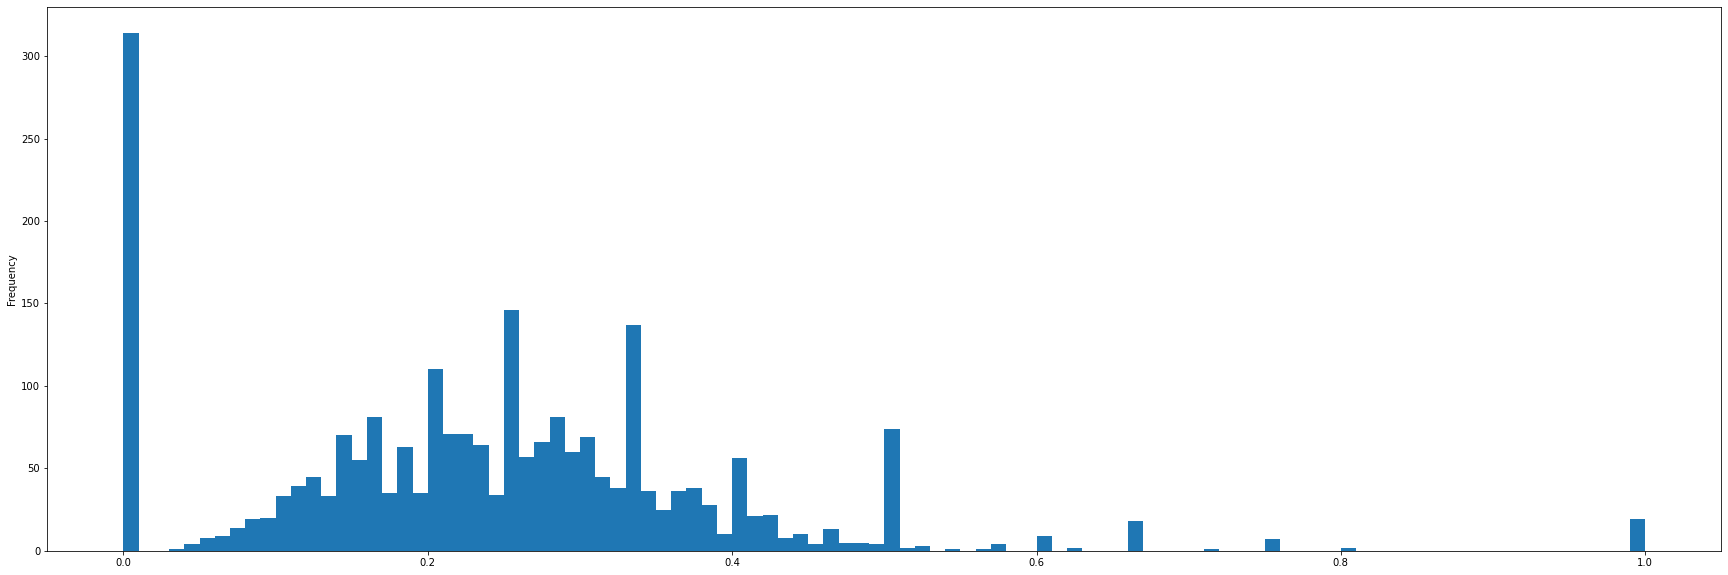

In [91]:
df_comparison_stats["intersection_over_train"].plot.hist(bins=100, figsize=(30,10))

In [92]:
result_all_features=dict(
    total_intersection_over_train = df_comparison_stats["intersection_size"].sum()/df_comparison_stats["train_size"].sum(),
    total_intersection_over_eval  = df_comparison_stats["intersection_size"].sum()/df_comparison_stats["eval_size"].sum(),
    total_train_products = df_train.shape[0],
    intersection_train_products = df_comparison_stats["train_size"].sum(),
    total_eval_products = df_eval.shape[0],
    intersection_eval_products = df_comparison_stats["eval_size"].sum(),
)
result_all_features

{'total_intersection_over_train': 0.2933797820483373,
 'total_intersection_over_eval': 0.08392438008534435,
 'total_train_products': 78366,
 'intersection_train_products': 78366,
 'total_eval_products': 274284,
 'intersection_eval_products': 273949}

# How does this change with less features?

In [93]:
USER_FEATURES       = ["Gender", "Age", "Occupation"]
train_shopping = df_train.rename(columns={"Product_ID":"Product_ID_train"}).groupby(USER_FEATURES)["Product_ID_train"].apply(np.array)
eval_shopping  = df_eval.rename(columns={"Product_ID":"Product_ID_eval"}).groupby(USER_FEATURES)["Product_ID_eval"].apply(np.array)

In [94]:
df_comparison  = pd.DataFrame([train_shopping, eval_shopping]).T.dropna()
df_comparison_stats=df_comparison.apply(lambda x: pd.Series({
    "train_size": x["Product_ID_train"].shape[0],
    "eval_size": x["Product_ID_eval"].shape[0],
    "intersection_size": np.intersect1d(x["Product_ID_train"], x["Product_ID_eval"]).shape[0]
}), axis=1)

In [95]:
df_comparison_stats["intersection_over_train"]=df_comparison_stats["intersection_size"]/df_comparison_stats["train_size"]

<AxesSubplot:ylabel='Frequency'>

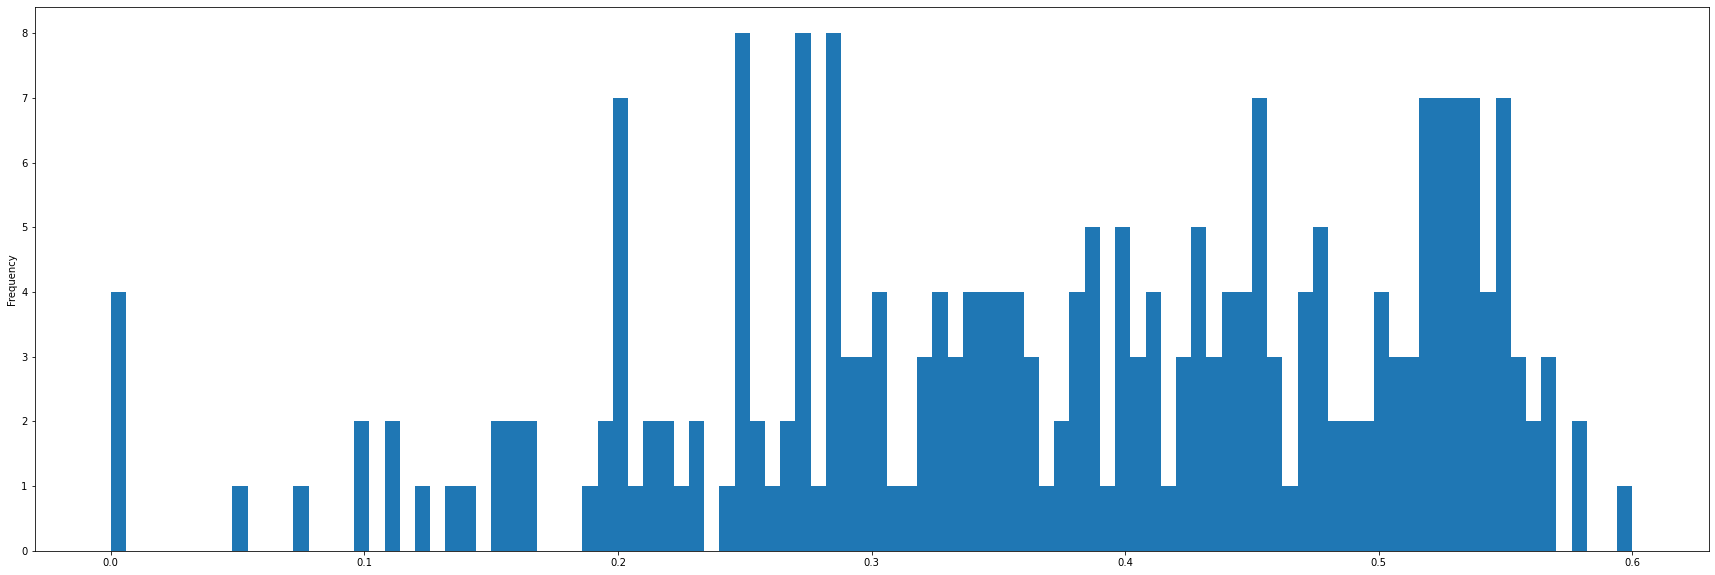

In [96]:
df_comparison_stats["intersection_over_train"].plot.hist(bins=100, figsize=(30,10))

In [97]:
result_few_features=dict(
    total_intersection_over_train = df_comparison_stats["intersection_size"].sum()/df_comparison_stats["train_size"].sum(),
    total_intersection_over_eval  = df_comparison_stats["intersection_size"].sum()/df_comparison_stats["eval_size"].sum(),
    total_train_products = df_train.shape[0],
    intersection_train_products = df_comparison_stats["train_size"].sum(),
    total_eval_products = df_eval.shape[0],
    intersection_eval_products = df_comparison_stats["eval_size"].sum(),
)
result_few_features

{'total_intersection_over_train': 0.4635173417043105,
 'total_intersection_over_eval': 0.1324349747336644,
 'total_train_products': 78366,
 'intersection_train_products': 78366,
 'total_eval_products': 274284,
 'intersection_eval_products': 274278}

In [98]:
pd.DataFrame({"result_all_features":result_all_features, "result_few_features":result_few_features})

,result_all_features,result_few_features
total_intersection_over_train,0.293380,0.463517
total_intersection_over_eval,0.083924,0.132435
total_train_products,78366.000000,78366.000000
intersection_train_products,78366.000000,78366.000000
total_eval_products,274284.000000,274284.000000
intersection_eval_products,273949.000000,274278.000000
